# Using SPICE with Korg.jl

Any spectrum model can be used with ```SPICE``` with some custom code. In this example, we are going to adapt [Korg.jl](https://github.com/ajwheeler/Korg.jl) to be used to generate a synthetic spectrum for a mesh model.

In [3]:
from juliacall import Main as jl

jl.seval("using Korg"); Korg = jl.Korg
from matplotlib import pyplot as plt

[ Info: Precompiling Korg [acafc109-a718-429c-b0e5-afd7f8c7ae46]


Text(0, 0.5, '$F_\\lambda/R_\\mathrm{star}^2$ [erg s$^{-1}$ cm$^{-5}$]')

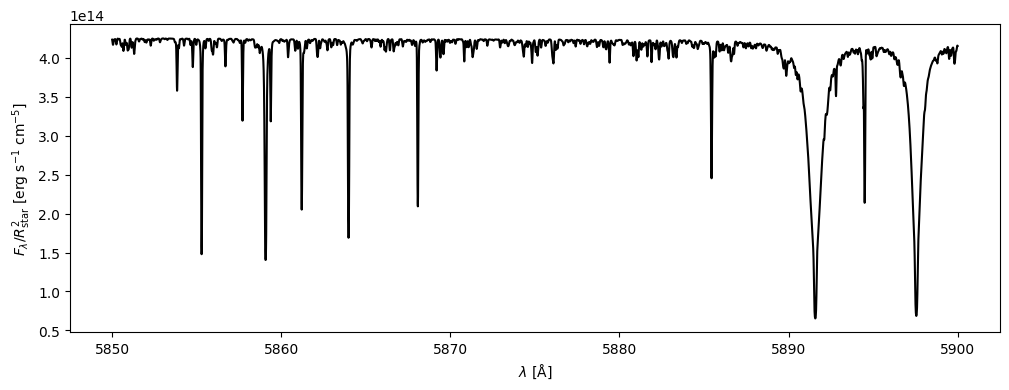

In [4]:
from matplotlib import pyplot as plt

# synthesize spectrum
lines = Korg.get_GALAH_DR3_linelist()
A_X = Korg.format_A_X(-1.1, {"C": -0.5})
atm = Korg.interpolate_marcs(5000.0, 4.32, A_X)
sol = Korg.synthesize(atm, lines, A_X, 5850, 5900);

# plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(sol.wavelengths, sol.flux, "k-")
ax.set_xlabel("$\lambda$ [Å]")
ax.set_ylabel("$F_\lambda/R_\mathrm{star}^2$ [erg s$^{-1}$ cm$^{-5}$]")

In [5]:
from spice.spectrum.spectrum_emulator import SpectrumEmulator
from numpy.typing import ArrayLike

class KorgSpectrumEmulator(SpectrumEmulator):
    def stellar_parameter_names(self) -> ArrayLike:
        raise NotImplementedError

    def flux(self, log_wavelengths: ArrayLike, parameters: ArrayLike) -> ArrayLike:
        raise NotImplementedError

    def intensity(self, log_wavelengths: ArrayLike, mu: float, parameters: ArrayLike) -> ArrayLike:
        """Calculate the intensity for given wavelengths and mus

        Args:
            log_wavelengths (T): [log(angstrom)]
            mu (float): cosine of the angle between the star's radius and the line of sight
            spectral_parameters (T): an array of predefined stellar parameters

        Returns:
            T: intensities corresponding to passed wavelengths [erg/cm2/s/angstrom]
        """
        raise NotImplementedError


92-element Vector{Float64}:
 12.0
 10.91
 -0.14000000000000012
  0.2799999999999998
  1.6
  7.960000000000001
  6.73
  7.59
  3.3000000000000003
  6.960000000000001
  ⋮
 -6.1
 -6.1
 -6.1
 -6.1
 -6.1
 -6.1
 -1.07
 -6.1
 -1.6400000000000001